<a href="https://colab.research.google.com/github/Sudip-Paul-03/Yes_Bank_Stock_Closing_Price_Analysis_by_Regression_Model/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_by_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Yes Bank Stock Closing Price Prediction**

## **(Supervised - Regression)**

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1**   - Sudip Paul
##### **Team Member 2**   - Sharik Nawaz
##### **Team Member 3**   - Bhupesh Rajput
##### **Team Member 4**   - Pooja Bramhavanshi

147272-yes-bank-share-price-reuters.avif

# **Project Summary -**

In the realm of financial data analysis, Yes Bank emerges as a compelling subject of study, driven by its eventful trajectory in recent years, particularly since 2018. This project is dedicated to the meticulous analysis and predictive modeling of Yes Bank's stock prices, employing a rich dataset spanning the bank's historical performance. Our core mission centers on the development of robust regression models capable of accurately forecasting the monthly closing price of Yes Bank's stock.

The crux of this endeavor lies in its paramount significance, as precise predictions of Yes Bank's stock prices hold immense value for diverse stakeholders, including investors and market participants. Yes Bank, once a stalwart in India's private banking sector, has grappled with complex challenges, including the burden of non-performing assets and entanglements in financial improprieties. The ensuing regulatory interventions by the Reserve Bank of India have rendered Yes Bank's stock price dynamics intricate and unpredictable.

To tackle this multifaceted challenge, our project leverages an extensive dataset, encompassing the entire historical spectrum of Yes Bank. Our aim is to construct regression models that aptly capture the nuanced dynamics and underlying trends in Yes Bank's stock prices, all the while accommodating the impact of unforeseeable events and market volatility associated with the bank's performance.

Our methodology deploys an array of regression techniques, rigorously scrutinized for their ability to precisely estimate the closing price of Yes Bank's stock. Importantly, the effectiveness of these models hinges on their capacity to incorporate the influence of significant events, such as fraudulent activities involving the bank's founders or regulatory interventions by the Reserve Bank of India.

The successful execution of this regression project is poised to offer invaluable insights, equipping stakeholders with the means to make data-driven investment decisions related to Yes Bank. Ultimately, our objective is to navigate the intricate landscape of Yes Bank's stock prices, disentangle the complexities inherent in its financial performance, and empower decision-makers with robust regression models for informed decision-making.

# **GitHub Link -**

https://github.com/Sudip-Paul-03/Yes_Bank_Stock_Closing_Price_Analysis_by_Regression_Model

# **Problem Statement**


#Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [56]:
# importing the required libraries

import warnings    # do not disturb mode
warnings.filterwarnings('ignore')


import numpy as np   # numerical computations
import pandas as pd  # Data Manupulation

import matplotlib.pyplot as plt  # visualize with plots
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import scipy.stats as stats   # statistics

from datetime import datetime   # to convert to date

from sklearn.model_selection import train_test_split   # split train and test data

from sklearn.compose import ColumnTransformer #  transformation

from sklearn.preprocessing import StandardScaler,MinMaxScaler # scale the data

from sklearn.preprocessing import FunctionTransformer,PowerTransformer

from sklearn.preprocessing import PolynomialFeatures  #Higher-Dimensional

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso # regression model

from sklearn.model_selection import GridSearchCV, cross_val_score # hyperparameters tunning

from sklearn.pipeline import Pipeline  # creating pipeline
from sklearn.pipeline import make_pipeline  # make pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score # import required metrics
#from sklearn.model_selection import cross_val_score

### Dataset Loading

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# Creating filepath
file_path =('/content/drive/MyDrive/AlmaBetter/Capstone/Regression on Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

In [4]:
# Loading Dataset
df=pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# Dataset last five row look

df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'There are total {df.shape[0]} rows and {df.shape[1]} columns.')

There are total 185 rows and 5 columns.


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
No_of_duplicate_rows = len(df[df.duplicated()])
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False).reset_index().rename(columns = {'index':'columns',0:'null values'})

,columns,null values
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0


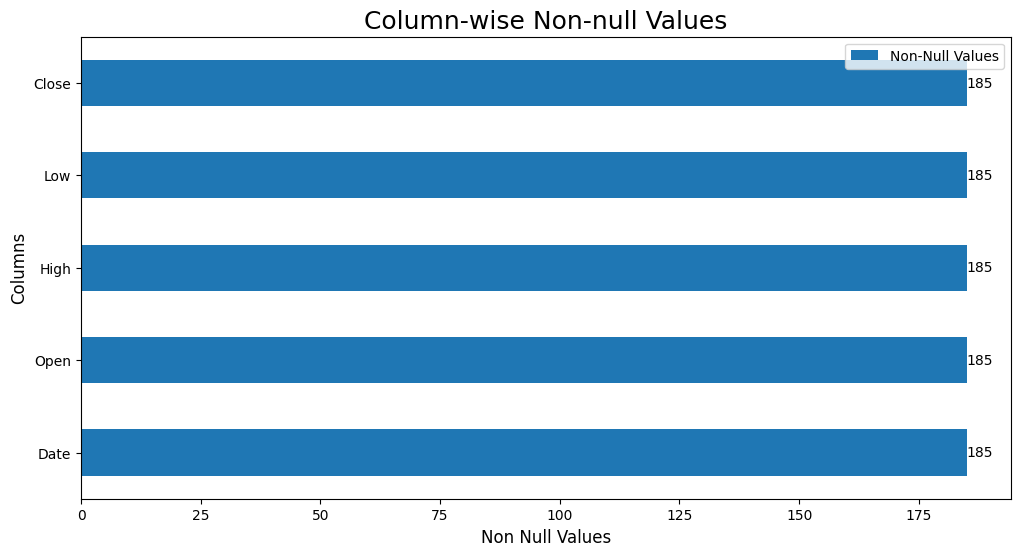

In [11]:
# Visualization of Non-null Values

non_null_values = df.notnull().sum().reset_index().rename(columns = {'index' : 'columns', 0 : "Non-Null Values"})

ax = non_null_values.plot(kind = 'barh', x = 'columns', figsize=(12,6))
ax.bar_label(ax.containers[0])
plt.ylabel('Columns', {'fontsize': 12, 'fontweight': 15})
plt.xlabel("Non Null Values", {'fontsize': 12, 'fontweight': 15})
plt.title('Column-wise Non-null Values',{'fontsize': 18, 'fontweight': 20})
plt.show()

### What did you know about your dataset?

* We have no null values
* Date column is of 'object' datatype we have to convert it to 'datetime'.
* Data type of Open, High, Low, Close columns are 'float64' we have to convert it into 'integer'.
* We have no duplicate values which makes the dataset easier to work with.

## **2. Understanding Your Variables**

In [12]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* We can see here that the std, mean, median, 50%, 25%, 75%, 100%, min and max values for open and closing price is almost similar and it might be due the the fact that the opening stock price of any day will be almost equal to the cloing price of the previous day.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
def unique_values(df):
    unique_vals = []
    for col in df.columns:
        unique_vals.append(df[col].unique())

    return unique_vals

In [15]:
unique_values(df)

[array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
        'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
        'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
        'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
        'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
        'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
        'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
        'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
        'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
        'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
        'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
        'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
        'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
        'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
        'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 

## 3. **Data Wrangling**

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### What all manipulations have you done and insights you found?

* We don't have to do any further data manipulation as the data is already in workable state and it does not require any changes.

## **4. Exploratory Data Analysis**

#### Chart - 1

In [17]:
# Chart - 1:3-D visualisation of data set


# Define spatial coordinates
x = df['Open']
y = df['Low']
z = df['High']

# Choose an attribute for coloring (e.g., 'Close' values)
attribute = df['Close']

# Create a 4D scatter plot using Plotly
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    marker=dict(
        size=8,
        color=attribute,
        colorscale='Viridis',  # Choose a suitable colorscale
        opacity=0.8
    ),
    mode='markers'
)

layout = go.Layout(
    scene=dict(
        xaxis_title='Open',
        yaxis_title='Close',
        zaxis_title='High'
    )
)

fig = go.Figure(data=[scatter], layout=layout)
fig.show()


* From this chart we get a idea about the dependency of opening price, highest price, lowest price and cloing price and from the type of graph we obtain we can say that they almost show a collinearity with each other.

#### Chart - 2

In [18]:
# Chart - 2: Visualizing yesbank stock Opening price over the time.
fig = px.line(df, df['Date'], df['Open'], title='Daily Opening price')


# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Opening price'),
    autosize=False,
    width=1600,
    height=500)

# display updated figure
fig.show()

* In this chart we can see the opening price in each day of the Yes Bank share.

#### Chart - 3

In [19]:
# Chart - 3: Visualizing yesbank stock closing price over the time.

fig = px.line(df, df['Date'], df['Close'], title='Daily Closing price')

# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1600,
    height=500)

# display updated figure
fig.show()

 * In this chart we can see the closing price in each day of the Yes Bank share.

#### Chart - 4

In [20]:
# Chart - 4: Visualizing yesbank stock Opening and closing price simultaneously over the time.

fig = px.line(df, x='Date', y=['Open', 'Close'], title='Daily Opening and Closing price')

# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price'),
    autosize=False,
    width=1600,
    height=500)

# Display the updated figure
fig.show()


* As we have already discussed earlier, we can see in most cases the closing price of any given date matches almost with the opening price of the next date.

#### Chart - 5

In [21]:
# Chart - 5: Candlestick representation of data
fig = go.Figure(data=[go.Candlestick(
                x=df['Date'],  # Date on the x-axis
                open=df['Open'],  # Open price
                high=df['High'],  # High price
                low=df['Low'],    # Low price
                close=df['Close']  # Close price
)])

# Customize the chart layout
fig.update_layout(
    title='Candlestick Chart with High and Low Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,  # Enable the range slider for zooming
)

# Display the chart
fig.show()


* This is the candlestick representation of the stock prices including the highest and lowest prices of the share in each day.

#### Chart - 6

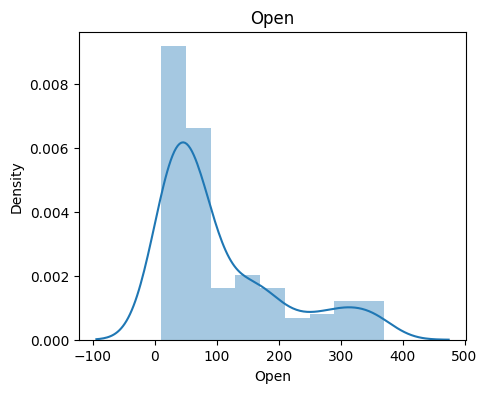

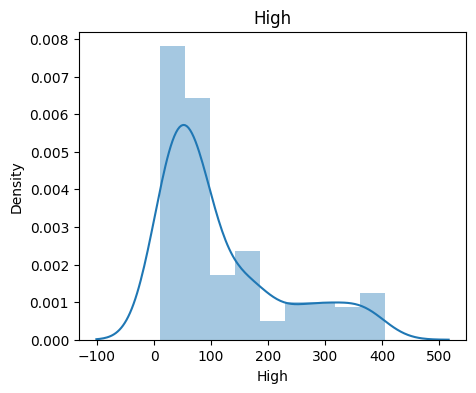

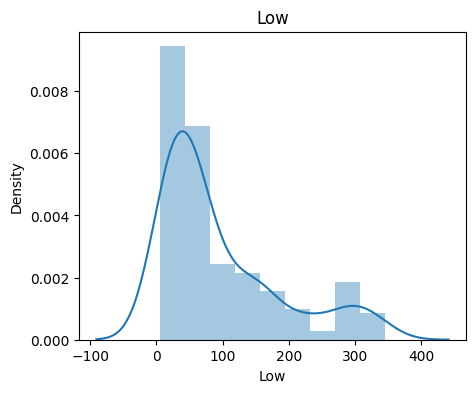

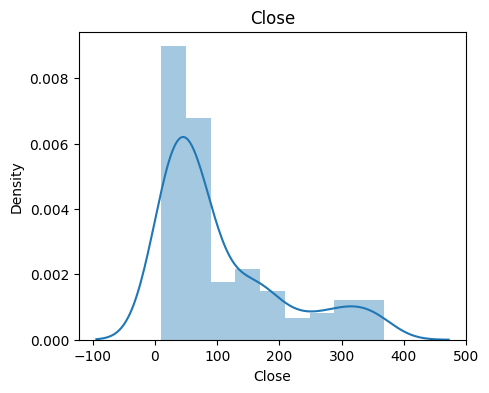

In [22]:
# Chart - 6: Plots for data distribution
df1=df.copy() # creating data frame copy

df1.set_index("Date",inplace=True) # set index of data frame


for col in df1.columns:
  plt.figure(figsize=(5,4)) # set figure size
  sns.distplot(df1[col])  #plot distplot
  plt.title(col)          # set up plot title

* Since our data is skewed, so we will perform some transformations during regression analysis.

#### Chart - 7

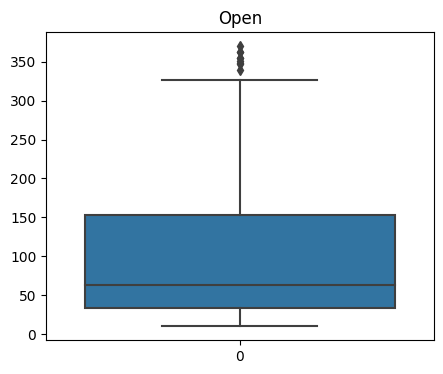

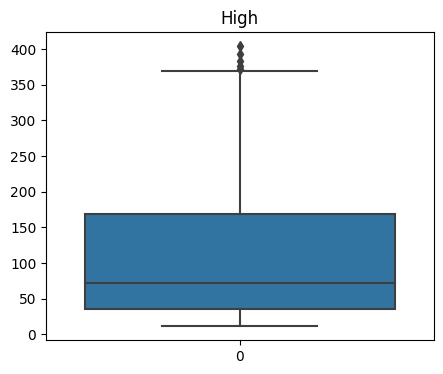

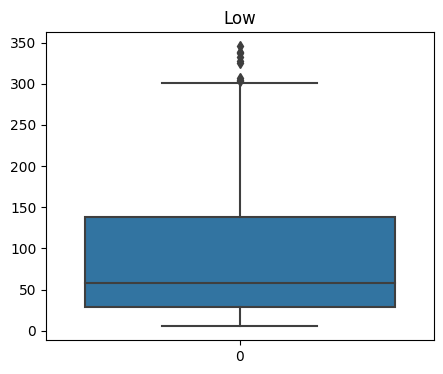

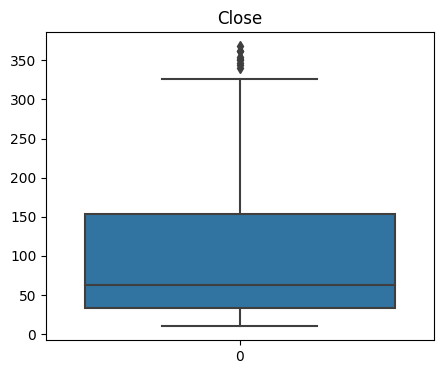

In [23]:
# Chart - 7:  checking the outlier in Dataset with the help of box whisker plot
for col in df1.columns:
  plt.figure(figsize=(5,4)) # set figure size
  sns.boxplot(df1[col])  # plot box plot
  plt.title(col)         # set up plot title

*  Above plot shows that there are some outliers in our dataset.
*  To handle outliers, various approaches can be employed, such as removing them from the dataset, transforming the data using robust statistical techniques, or imputing them with more representative values. The choice of the method depends on the nature of the data and the specific requirements of the analysis.

#### Chart - 8

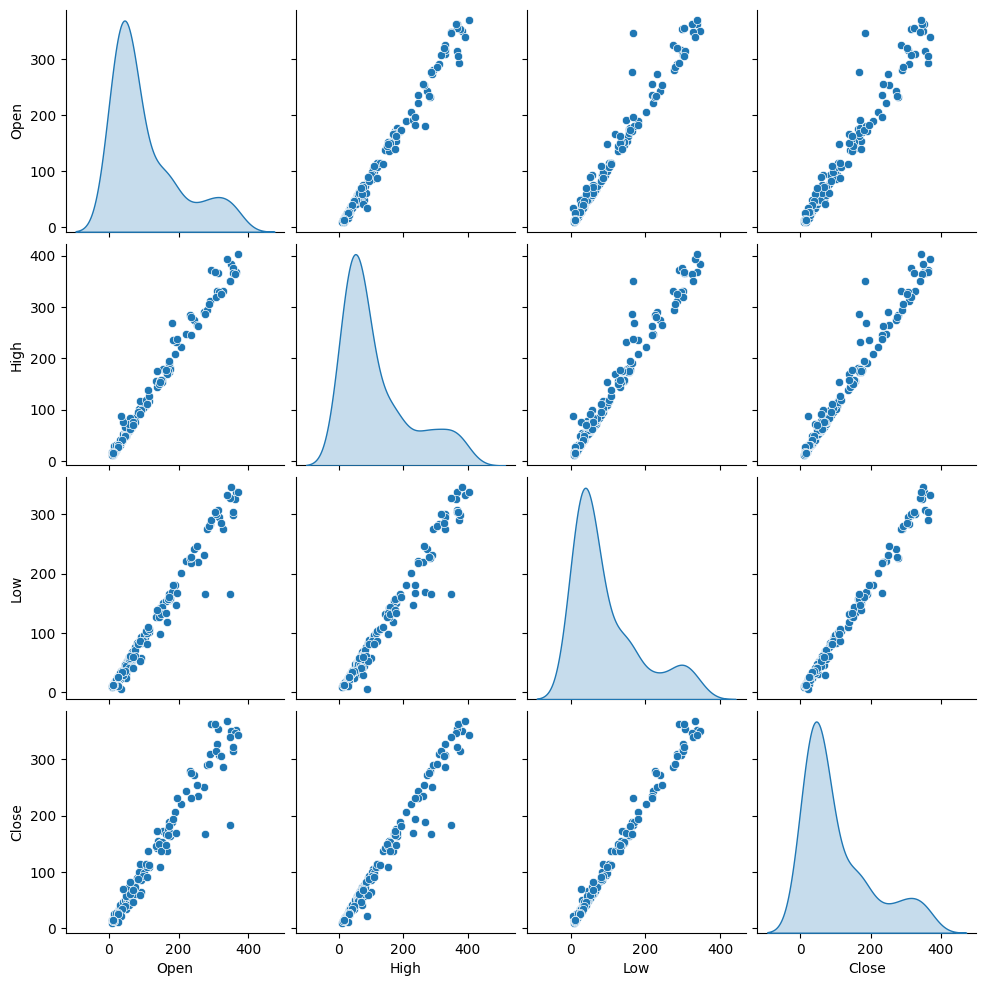

In [24]:
# Chart - 8: Visualizing the pair plot
sns.pairplot(df,diag_kind='kde')  #plot pair plot
plt.show()                        # Display figure

*  A pair plot graph is used for analyzing the Yes Bank stock price because it helps explore relationships, detect patterns and trends, and identify outliers..
It allows for correlation analysis and understanding of data distributions.
*  Above graph shows that our data is not normally distributed. So,We will
transform the data to bring it into a normal distribution.

#### Chart - 9

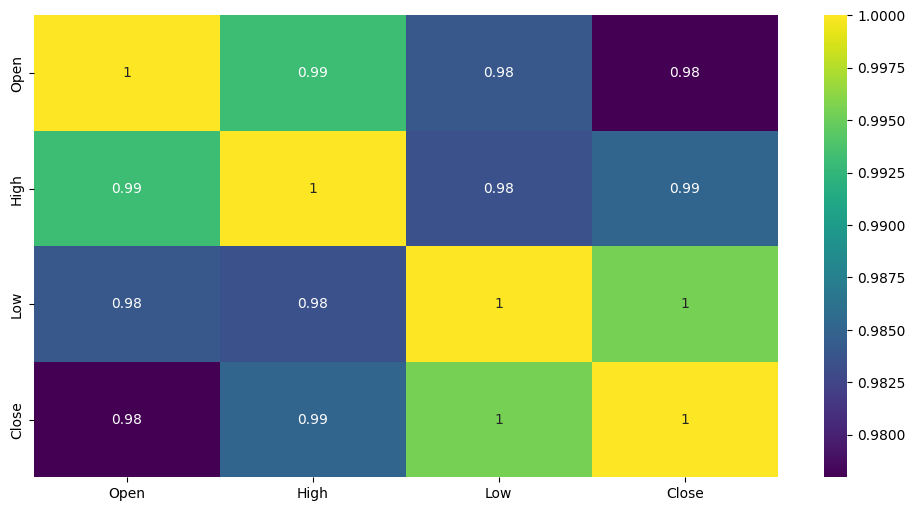

In [25]:
# Chart - 9: Our first step to check multicollinearity
plt.figure(figsize=(12,6))                                #setup figure size
sns.heatmap(df.corr(), annot = True, cmap='viridis')      #plot heat map
plt.show()                                                # display figure

*  From the above plot, it is very evident that there is high collinearity. Each and every feature is highly correlated with every other feature.(i.e. Multicollinearity).
*  The gained insights are useful to understand and get an idea about the collinearity of the features so that we could deal with it in future model implentation.

## **5. Feature Engineering & Data Pre-processing**

### 1. Feature Engineering on 'Date' column

In [26]:
#copying data to preserve orignal file
data = df.copy()

In [27]:
# convert string object to datetime object
date_series = data['Date']
date_format = '%b-%y'  # Example format (YYYY-MM-DD)
data['Date'] = date_series.apply(lambda x: datetime.strptime(x, date_format))

In [28]:
#set date as index
data.set_index('Date',inplace=True)

In [29]:
#check if changes are being reflected
data

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


Here we have converted the string document date into first date type object and then into integer.

### 2. Removing the Multi-Collinearity problem

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [43]:
# We add a column Average_Price in the dataset
# Calculate the average price
data['Average_Price'] = round((data['Open'] + data['High'] + data['Low']) / 3, 2)

# Change the Column order

data = data.iloc[:, [0,1,2,4,3]]

#Show the dataframe
data

,Open,High,Low,Average_Price,Close
Date,,,,,
2005-07-01,13,14,11,12.67,12
2005-08-01,12,14,12,12.67,13
2005-09-01,13,14,12,13.00,13
2005-10-01,13,14,12,13.00,12
2005-11-01,13,13,12,12.67,13
...,...,...,...,...,...
2020-07-01,25,28,11,21.33,11
2020-08-01,12,17,11,13.33,14
2020-09-01,14,15,12,13.67,13


The high multi collinearity problem between the independent variables has been replaced by Average Price of the three independent variables.

### 3. Data Manipulation

In [34]:
#applying log tranform
transformed_df = np.log(data)

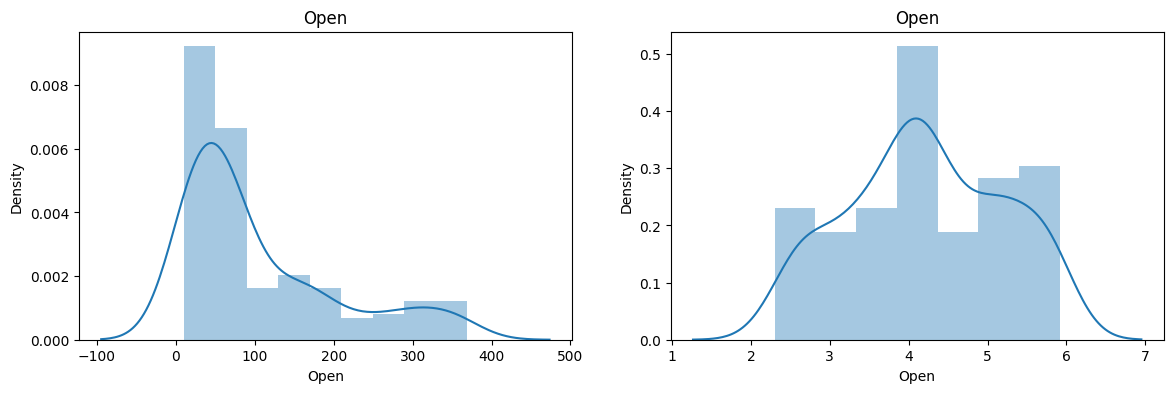

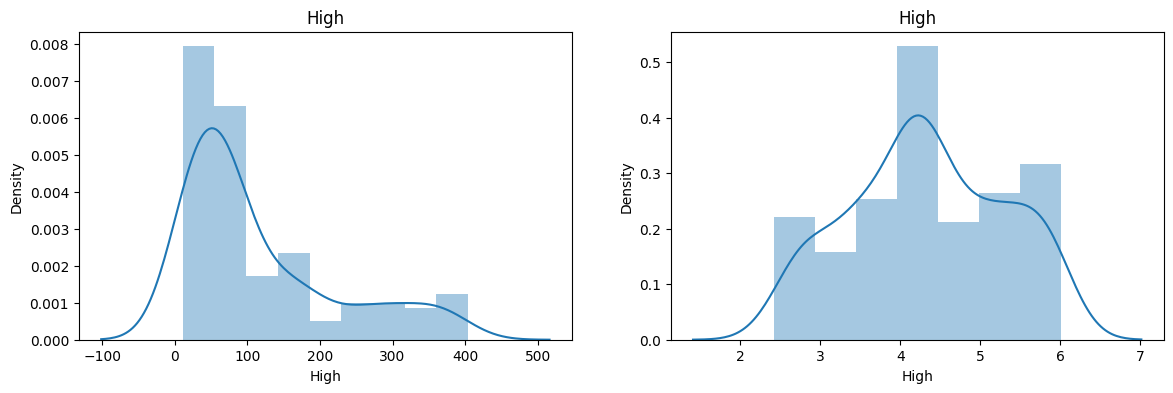

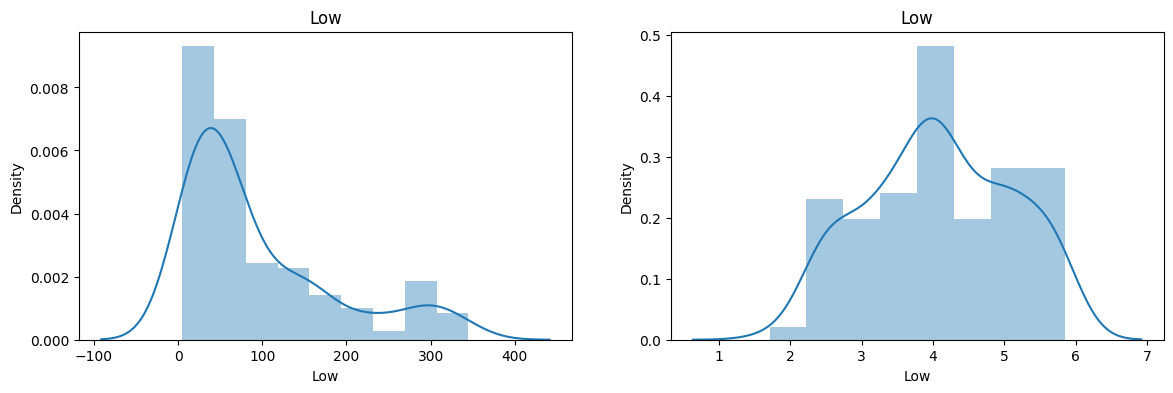

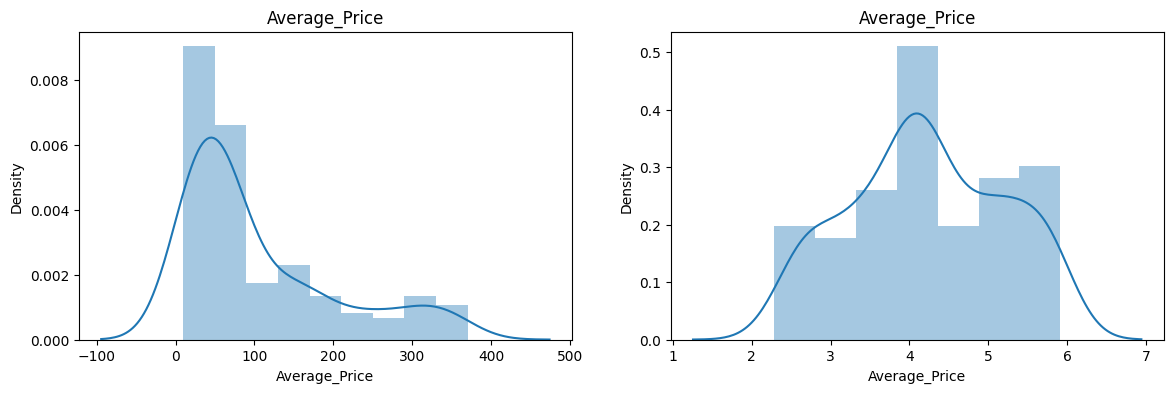

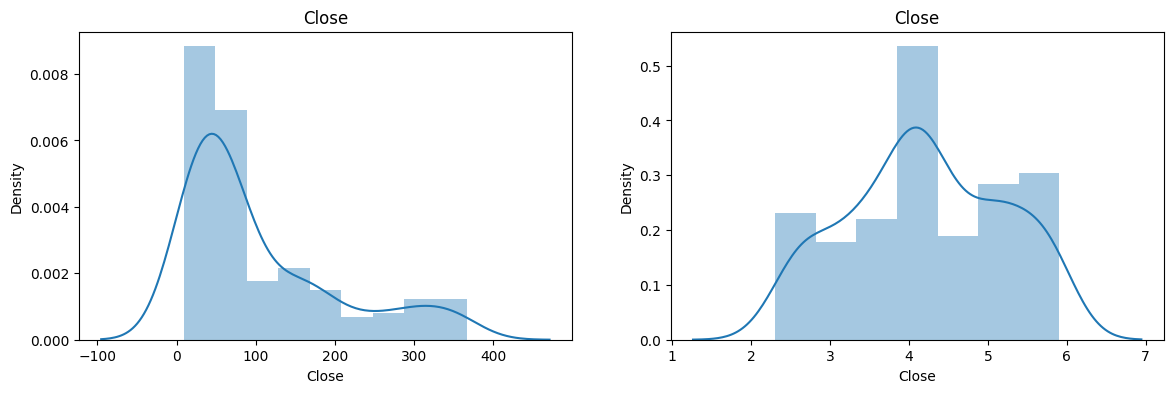

In [44]:
#plots for dependent variable before and after doing tranformation
transformed_df = pd.DataFrame(transformed_df,columns=data.columns)

for col in transformed_df.columns:
    plt.figure(figsize=(14,4)) # setup figure size

    plt.subplot(1,2,1)         #plot first subplot
    sns.distplot(data[col])    #plot dist plot

    plt.title(col)             #set up plot title



    plt.subplot(1,2,2)                   #plot second subplot

    sns.distplot(transformed_df[col])    #plot distplot

    plt.title(col)                       # set up plot title

    plt.show()                           #display figure

We see the distribution of each of the variables are highly rightly skewed so we did the logarithmic transformation in the dataset.

### 4. Changing the Data Type

In [45]:
#convert dtype float to integer

data= data.iloc[:,:6].astype(int)

In [46]:
#check if changes are being reflected
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           185 non-null    int64
 1   High           185 non-null    int64
 2   Low            185 non-null    int64
 3   Average_Price  185 non-null    int64
 4   Close          185 non-null    int64
dtypes: int64(5)
memory usage: 8.7 KB


### 5. Data Splitting

In [47]:
# Selecting the independent variables
features = ['Open','Low', 'High', 'Average_Price']

In [48]:

# Separating the X variables
X = data[features]

In [49]:
# Separating the dependent variables
Y = data['Close']

In [50]:
#Train/Test/Split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2,
                                                random_state=42)
print(X_train.shape,X_test.shape)

(148, 4) (37, 4)


## **6. ML Model Implementation**

### ML Model - 1 : Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# ML Model - 1: Lasso Regression

# create a column transformer
trf1 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,5))
])

In [57]:
# Implementing Lasso Regression
trf5 = Lasso()

In [58]:
# Create the pipeline for Lasso Regression

lasso = make_pipeline(trf1, trf5)

In [59]:
# Fit the training datasets into the lasso pipeline
lasso.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 5, None))])),
                ('lasso', Lasso())])

In [60]:
# Predict the test dataset
lasso_pred= lasso.predict(X_test)

In [61]:
# check train and test accuracy
lasso_train_accuracy = round(lasso.score(X_train,Y_train), 4)
lasso_test_accuracy = round(lasso.score(X_test,Y_test), 4)
lasso_cross_val= round(cross_val_score(lasso,X_train,Y_train,cv=10).mean(), 4)

In [62]:
# Print the train and test accuracy
print('Train accuracy',lasso_train_accuracy)
print('Test accuracy',lasso_test_accuracy)
print('cross validity',lasso_cross_val)

Train accuracy 0.9915
Test accuracy 0.9877
cross validity 0.9864


In [63]:
#Evaluate the metrics

lasso_MAE = round(mean_absolute_error(Y_test, lasso_pred), 4)
print("MAE :" , lasso_MAE)

lasso_MSE  = round(mean_squared_error(Y_test, lasso_pred), 4)
print("MSE :" , lasso_MSE)

lasso_RMSE = round(np.sqrt(lasso_MSE), 4)
print("RMSE :" ,lasso_RMSE)

lasso_r2 = round(r2_score(Y_test, lasso_pred), 4)
print("R2 :" , lasso_r2)

lasso_Adj_r2 = round(1-(1-r2_score(Y_test, lasso_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)

MAE : 6.914
MSE : 111.0993
RMSE : 10.5404
R2 : 0.9877


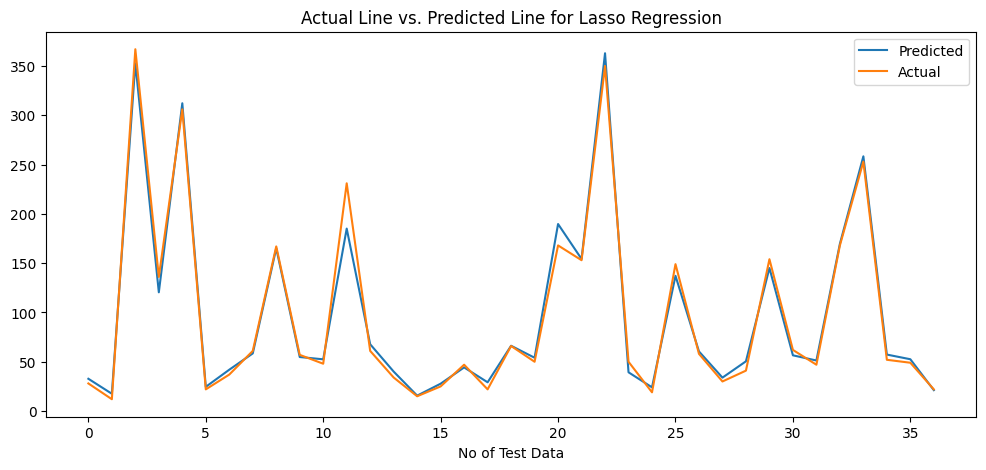

In [64]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(12,5))  # Set up the figure size
plt.plot(lasso_pred)     # plot the lasso pred
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')  # set X-axis lable
plt.title('Actual Line vs. Predicted Line for Lasso Regression') # set plot title
plt.show()                                  # figure display

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# Create a pipeline with preprocessing and the model
pipeline1 = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('model', Lasso())  # Lasso regression model
])

In [67]:
# Defining the Hyper parameter Grid
param_grid1 = {

    'poly_features__degree': [2, 3, 4, 5, 6,8],  # Degree of polynomial features
    'scaler__feature_range': [(0, 1), (0, 2)],  # MinMaxScaler's feature_range
    'model__alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],#  regularization strength

}

In [68]:
# Perform Hyperparameter Tuning with GridSearchCV
grid_search1= GridSearchCV(pipeline1, param_grid=param_grid1, cv=5, scoring='neg_mean_squared_error' )
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05,
                                          0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                          20, 30, 40, 45, 50, 55, 60, 100],
                         'poly_features__degree': [2, 3, 4, 5, 6, 8],
                         'scaler__feature_range': [(0, 1), (0, 2)]},
             scoring='neg_mean_squared_error')

In [69]:
# Print the Best Hyperparameters
print("Best Hyperparameters:", grid_search1.best_params_)
best_model1 = grid_search1.best_estimator_

Best Hyperparameters: {'model__alpha': 0.01, 'poly_features__degree': 4, 'scaler__feature_range': (0, 1)}


In [70]:
# make prediction
Lasso_pred = best_model1.predict(X_test)

In [71]:
# Evaluate the train and test accuracy
Lasso_train_accuracy = round(best_model1.score(X_train,Y_train), 4)
Lasso_test_accuracy  = round(best_model1.score(X_test,Y_test), 4)
Lasso_cross_val = round(cross_val_score(best_model1,X_train,Y_train,cv=10).mean(), 4)

In [72]:
# Print the train and test accuracy
print('train_accuracy',Lasso_train_accuracy )
print('test_accuracy',Lasso_test_accuracy )
print('cross_val',Lasso_cross_val )

train_accuracy 0.9964
test_accuracy 0.9898
cross_val 0.9901


In [83]:
# evaluate the metrics

Lasso_MAE = round(mean_absolute_error(Y_test,Lasso_pred), 4)
print("MAE :" ,Lasso_MAE)

Lasso_MSE  = round(mean_squared_error(Y_test,Lasso_pred), 4)
print("MSE :" , Lasso_MSE)

Lasso_RMSE = round(np.sqrt(Lasso_MSE), 4)
print("RMSE :" ,Lasso_RMSE)

Lasso_R2_score = round(r2_score(Y_test,Lasso_pred), 4)
print('R2_score:',Lasso_R2_score)

Lasso_Adj_r2 = round(1-(1-r2_score(Y_test, Lasso_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
print("Adjusted R2 : ", Lasso_Adj_r2)

MAE : 6.021
MSE : 92.2009
RMSE : 9.6021
R2_score: 0.9898
Adjusted R2 :  0.9885


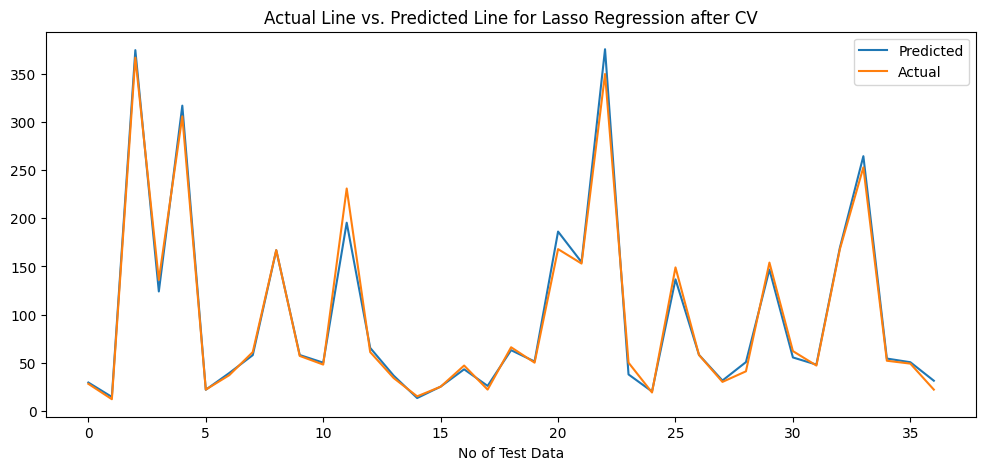

In [74]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(12,5)) #set up the figure size
plt.plot(Lasso_pred)   #plot the prediction
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')  # set X-axis lable
plt.title('Actual Line vs. Predicted Line for Lasso Regression after CV') # set plot title
plt.show()                                  # figure display

### 3. What can you say about the model's performance?

After cross-validation, the Lasso regression model demonstrated improved performance. The post-cross-validation Lasso regression model showed a decrease in Mean Absolute Error (MAE) from 6.9140 to 6.021, a decrease in Mean Squared Error (MSE) from 111.0993 to 92.2009, and a decrease in Root Mean Squared Error (RMSE) from 10.5404 to 9.6021. Additionally, the R-squared (R2) score increased from 0.9877 to 0.9898, and the Adjusted R-squared score increases from 0.9862 to 0.9885.

In conclusion, the Lasso regression model displayed improved performance after cross-validation, with lower errors and higher goodness-of-fit (R2 and Adjusted R2) values. This suggests that the model generalizes better and is more robust in making predictions on new data after the cross-validation process.

## **Choosing the Appropiate Model for Regression**

In [81]:
# Initialize lists to store metric names and values
metric_names = ['MAE', 'MSE', 'RMSE', 'R2_score']
metric_values_list = []

# Initialize index names for each set of predicted values
index_names = ['lasso regression', 'Lasso regression']

# Loop through each set of predicted values
for pred_values in [lasso_pred, Lasso_pred]:
    metrics = {
        'MAE': round(mean_absolute_error(Y_test, pred_values), 4),
        'MSE': round(mean_squared_error(Y_test, pred_values), 4),
        'RMSE': round(np.sqrt(mean_squared_error(Y_test, pred_values)), 4),
        'R2_score': round(r2_score(Y_test, pred_values), 4),
        'Adjusted_r2_score' : round(1-(1-r2_score(Y_test, pred_values))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
         }
    metric_values_list.append(metrics)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metric_values_list,index=index_names)

In [82]:
# show the dataset
metrics_df

,MAE,MSE,RMSE,R2_score,Adjusted_r2_score
lasso regression,6.914,111.0993,10.5404,0.9877,0.9862
Lasso regression,6.021,92.2009,9.6021,0.9898,0.9885


In [78]:
#sorting metrics
metrics_df.sort_values(by=['R2_score'],ascending=False,inplace=True)

In [79]:
# show the dataset
metrics_df

,MAE,MSE,RMSE,R2_score,Adjusted_r2_score
Lasso regression,6.021,92.2009,9.6021,0.9898,0.9885
lasso regression,6.914,111.0993,10.5404,0.9877,0.9862


### **Linear Regression Model by Sharik Nawaz**

This Linear Regression model demonstrates excellent performance. It predicts the target variable with high accuracy, as indicated by the low Mean Absolute Error (MAE) of approximately 6.466, which means, on average, the model's predictions are very close to the true values. The Mean Squared Error (MSE) (108.5532) and Root Mean Squared Error (RMSE) (10.4189) also show small errors, further supporting the model's predictive accuracy.

Moreover, the model effectively captures the underlying patterns in the data, as reflected in the high R-squared (R2) score of 0.988. This score suggests that the model explains roughly 98.80% of the variance in the target variable, indicating a strong fit to the data. Additionally, the adjusted R-squared score of 0.9865 highlights that the model's performance remains robust even when considering its complexity.

### **Ridge Regression Model by Bhpesh Rajput**

After cross-validation, the Ridge regression model improved in terms of its evaluation metrics. The post-cross-validation Ridge regression model showed a decrease in Mean Absolute Error (MAE) from 7.4496 to 6.2734, a decrease in Mean Squared Error (MSE) from 177.5783 to 122.2454, and a increase in Root Mean Squared Error (RMSE) from 10.4189 to 11.0565. Additionally, the R-squared (R2) score increased from 0.9804 to 0.9865, and the Adjusted R-squared score increased from 0.9779 to 0.9848.

In conclusion, the Ridge regression model demonstrated improved performance in terms of lower errors and higher goodness-of-fit (R2 and Adjusted R2) after cross-validation, indicating that the model generalizes better and is likely more robust in making predictions on new data.

### **Elastic Net Regression by Puja Bramhavanshi**

After cross-validation, the ElasticNet regression model demonstrated significant improvement in performance. The post-cross-validation ElasticNet regression model showed a substantial decrease in Mean Absolute Error (MAE) from 51.1351 to 6.295, a significant decrease in Mean Squared Error (MSE) from 3728.1351 to 96.5128, and a substantial decrease in Root Mean Squared Error (RMSE) from 61.0585 to 9.8241. Additionally, the R-squared (R2) score increased from 0.5876 to 0.9893, and the Adjusted R-squared score increased from 0.5361 to 0.9880.

In conclusion, the ElasticNet regression model exhibited a remarkable improvement in performance after cross-validation. It had substantially lower errors and significantly higher goodness-of-fit (R2 and Adjusted R2) values, indicating that the model generalizes much better and is vastly more robust in making predictions on new data after the cross-validation process.

# **Conclusion**


## From the EDA analysis and by implementing Regression Models we can conclude that,

1. From 2016 to 2018 stock closing price increased but after year 2018, it started decreasing (it could be because of the Rana Kapoor case).

2. We got to know that data for dependent and independent variables are rightly skewed for we applied log transformation.

3. The log transformation successfully addressed the positive skewness observed in all features, ensuring adherence to the assumptions of the linear regression models.

4. The **metrics_df**  presents the evaluation metrics for seven different regression models: Linear Regression, Ridge Regression (with and without cross validation), Lasso Regression (with and without cross validation) and ElasticNet Regression (with and without cross validation). Each model's performance has been assessed based on metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2_score) and Adjusted R-squared (Adjusted_r2_score). And from this dataset we can conclude the following:

  a) Model Performance:
  Among the evaluated models, Lasso regression and ElasticNet regression exhibit the best performance across all metrics, with low Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and high R-squared (R2) scores. This indicates that both Lasso and ElasticNet are effective in capturing the underlying patterns in the data.
  
  b) Overfitting:
  The presence of high MAE, MSE, RMSE, and relatively lower R2 scores in the "elasticnet regression" model suggests overfitting. Overfitting occurs when a model learns noise in the data rather than the underlying patterns, which results in poor generalization to new data.
  
  c) Linear and Ridge Regression:
  Linear and Ridge regression models perform reasonably well but are outperformed by Lasso and ElasticNet. However, they still provide relatively low errors and high R2 scores, indicating their effectiveness in modeling the data.
  
  d) R2 Score:
  R2 score measures how well the model explains the variance in the target variable. All models, except for "elasticnet regression," have high R2 scores (close to 1), suggesting that they can explain a significant portion of the variance in the target variable.
  
  e) Adjusted R2 Score:
  Adjusted R2 score adjusts the R2 score based on the number of predictors in the model. Models with higher adjusted R2 scores are generally better at explaining variance while penalizing the inclusion of unnecessary predictors. Lasso and ElasticNet have the highest adjusted R2 scores.


  
#**In conclusion, the Lasso regression and ElasticNet regression models emerges as the top performer among all the evaluated models. They shows exceptional accuracy and a remarkable fit to the data, which is evident from the low values of MAE, MSE, RMSE, and the high R2_score. Linear and Ridge regression can be considered if you want a simpler model and are less concerned about feature selection. The choice of the best model depends on the specific application's requirements and trade-offs between accuracy and complexity.**